### No 1a

### **Data Prepocessing**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Bank_Loan_Granting.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


### **Exploratory Data**

In [5]:
df.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,0/30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,NaN,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,NaN,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,NaN,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

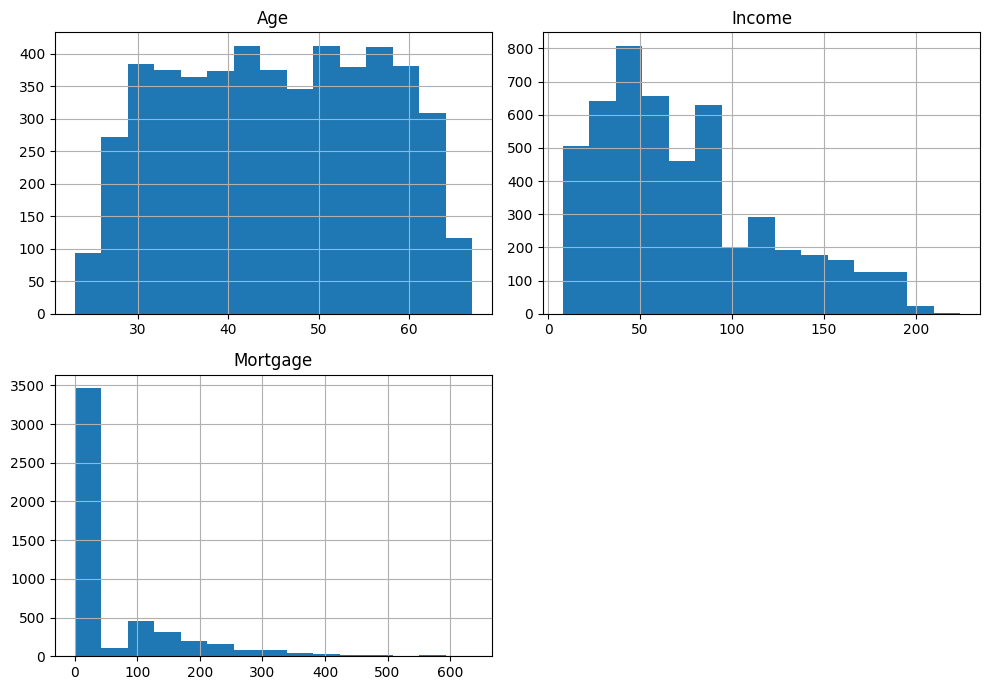

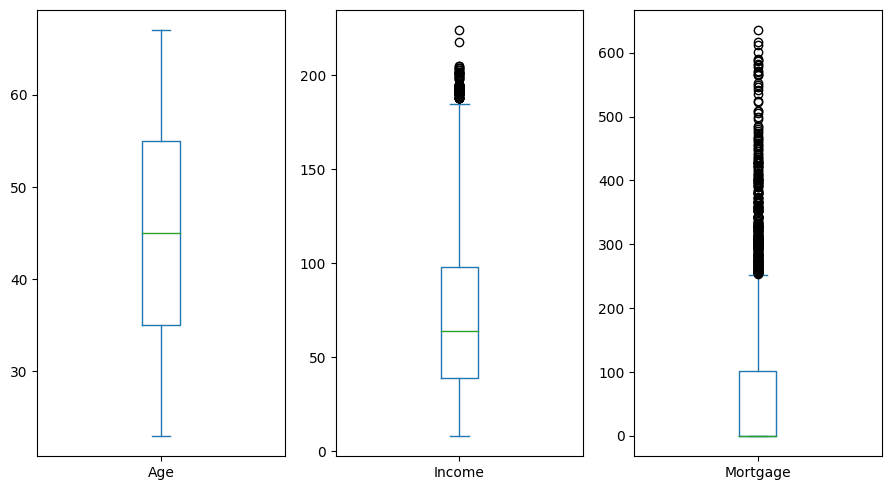

In [7]:
# Histogram dan Boxplot untuk variabel numerik
numerical_vars = ['Age', 'Income', 'CCAvg', 'Mortgage']
df[numerical_vars].hist(bins=15, figsize=(10, 7))
plt.tight_layout()
plt.show()

df[numerical_vars].plot(kind='box', subplots=True, layout=(1,4), figsize=(12, 5))
plt.tight_layout()
plt.show()


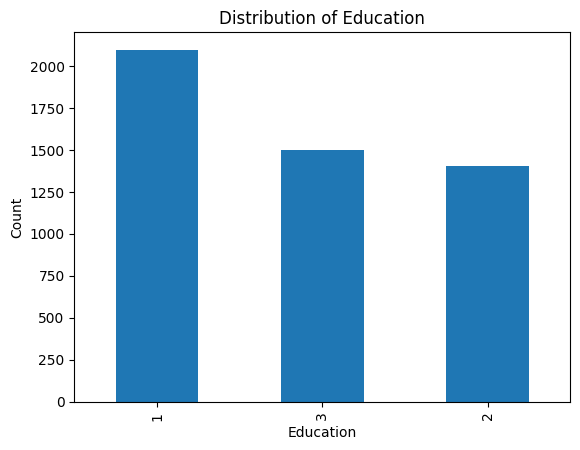

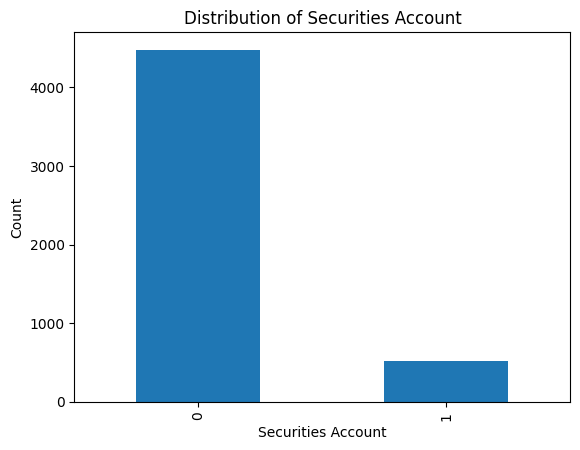

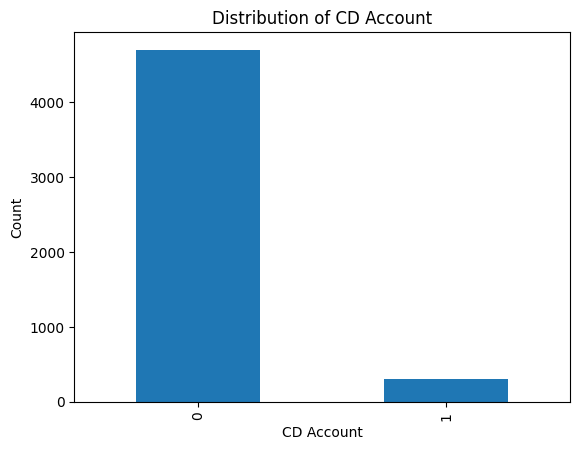

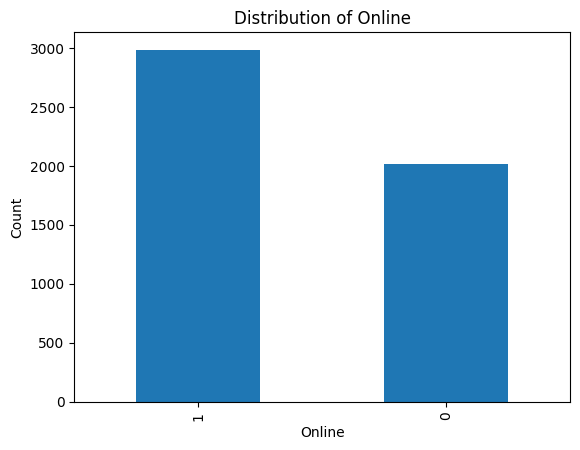

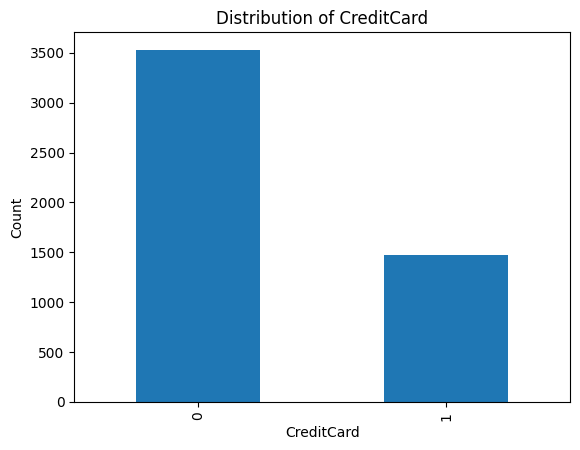

In [8]:
# Barplot untuk variabel categorical
categorical_vars = ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for var in categorical_vars:
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.show()

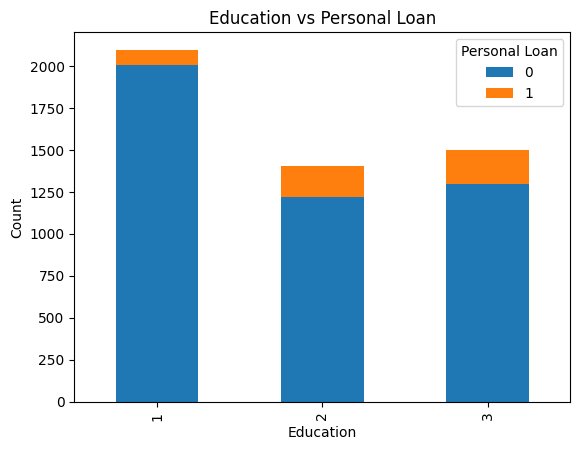

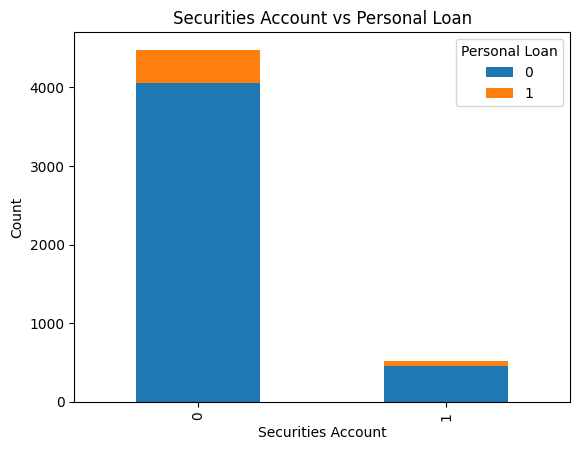

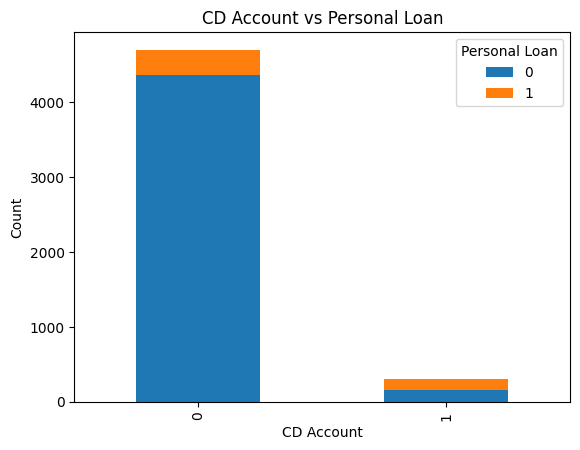

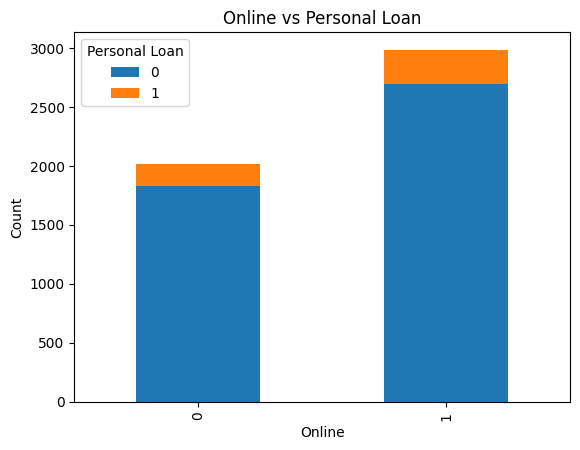

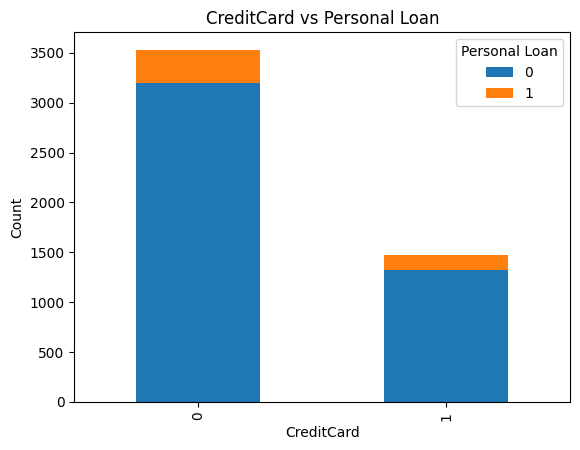

In [9]:
# Hubungan independent var. dengan variabel target
target_var = 'Personal Loan'
for var in categorical_vars:
    pd.crosstab(df[var], df[target_var]).plot(kind='bar', stacked=True)
    plt.title(f'{var} vs {target_var}')
    plt.ylabel('Count')
    plt.show()

Data Type Convertion

In [10]:
def convert_fraction(x):
    try:
        numerator, denominator = map(float, x.split('/'))
        if denominator == 0:
            return 0.0
        else:
            return numerator / denominator
    except ValueError:
        return 0.0

df['CCAvg'] = df['CCAvg'].apply(convert_fraction)

Normalization / Standarization

In [11]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,-1.774417,-1.666078,-0.538229,91107,1.397414,-0.282508,-1.049078,-0.555524,0,1,0,0,0
1,2,-0.029524,-0.096330,-0.864109,90089,0.525991,-0.238549,-1.049078,-0.555524,0,1,0,0,0
2,3,-0.552992,-0.445163,-1.363793,94720,-1.216855,-0.502305,-1.049078,-0.555524,0,0,0,0,0
3,4,-0.901970,-0.968413,0.569765,94112,-1.216855,-0.125510,0.141703,-0.555524,0,0,0,0,0
4,5,-0.901970,-1.055621,-0.625130,91330,1.397414,-0.502305,0.141703,-0.555524,0,0,0,0,1


In [12]:
from sklearn.model_selection import train_test_split

features = df.drop(['ID', 'Personal Loan', 'ZIP Code'], axis=1)  # Dropping 'ID' and 'ZIP Code' cause they are not useful for modeling
target = df['Personal Loan']

# Data Splitting (training + temp)
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.2, random_state=42)

# Data Splitting (test + validation)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

(X_train.shape, X_val.shape, X_test.shape)


((4000, 11), (500, 11), (500, 11))

Baseline Architecture

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_features = X_train.shape[1]

model_baseline = Sequential([
    Dense(2 * n_features, input_dim=n_features, activation='relu'),
    Dense(2 * n_features, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_baseline.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_baseline.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_val, y_val))

baseline_results = model_baseline.evaluate(X_test, y_test)

Epoch 1/50
400/400 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.9260 - val_loss: 0.1018 - val_accuracy: 0.9680
Epoch 2/50
400/400 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.9630 - val_loss: 0.0643 - val_accuracy: 0.9800
Epoch 3/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9682 - val_loss: 0.0558 - val_accuracy: 0.9840
Epoch 4/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9712 - val_loss: 0.0502 - val_accuracy: 0.9800
Epoch 5/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9725 - val_loss: 0.0455 - val_accuracy: 0.9820
Epoch 6/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0723 - accuracy: 0.9740 - val_loss: 0.0432 - val_accuracy: 0.9840
Epoch 7/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9747 - val_loss: 0.0459 - val_accuracy: 0.9800
Epoch 

In [14]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Modifikasi model dengan Dropout dan Batch Normalization
model_modified = Sequential([
    Dense(2 * n_features, input_dim=n_features, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2 * n_features, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Menggunakan Adam optimizer dengan learning rate yang lebih rendah
optimizer = Adam(learning_rate=0.001)
model_modified.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model_modified.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_val, y_val))
modified_results = model_modified.evaluate(X_test, y_test)

Epoch 1/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4757 - accuracy: 0.7825 - val_loss: 0.1981 - val_accuracy: 0.9540
Epoch 2/50
400/400 [==============================] - 1s 1ms/step - loss: 0.2315 - accuracy: 0.9120 - val_loss: 0.1211 - val_accuracy: 0.9580
Epoch 3/50
400/400 [==============================] - 1s 1ms/step - loss: 0.1880 - accuracy: 0.9252 - val_loss: 0.1022 - val_accuracy: 0.9620
Epoch 4/50
400/400 [==============================] - 1s 1ms/step - loss: 0.1655 - accuracy: 0.9367 - val_loss: 0.0891 - val_accuracy: 0.9640
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.1488 - accuracy: 0.9465 - val_loss: 0.0809 - val_accuracy: 0.9680
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.1483 - accuracy: 0.9482 - val_loss: 0.0700 - val_accuracy: 0.9680
Epoch 7/50
400/400 [==============================] - 1s 2ms/step - loss: 0.1385 - accuracy: 0.9500 - val_loss: 0.0623 - val_accuracy: 0.9760
Epoch 

In [15]:
y_pred_baseline = (model_baseline.predict(X_test) > 0.5).astype(int)
y_pred_modified = (model_modified.predict(X_test) > 0.5).astype(int)

16/16 [==============================] - 0s 1ms/step


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

metrics_baseline = calculate_metrics(y_test, y_pred_baseline)
metrics_modified = calculate_metrics(y_test, y_pred_modified)

print("Baseline Model Metrics:")
print(f"Accuracy: {metrics_baseline[0]:.2f}, Precision: {metrics_baseline[1]:.2f}, Recall: {metrics_baseline[2]:.2f}, F1 Score: {metrics_baseline[3]:.2f}")
print("Modified Model Metrics:")
print(f"Accuracy: {metrics_modified[0]:.2f}, Precision: {metrics_modified[1]:.2f}, Recall: {metrics_modified[2]:.2f}, F1 Score: {metrics_modified[3]:.2f}")


Baseline Model Metrics:
Accuracy: 0.98, Precision: 0.91, Recall: 0.89, F1 Score: 0.90
Modified Model Metrics:
Accuracy: 0.99, Precision: 1.00, Recall: 0.85, F1 Score: 0.92


**Conclusion :**

In this project, I developed a deep learning model to predict whether a customer will take a personal loan based on various attributes such as age, income, education, and account details. The process involved thorough data preprocessing, normalization, and exploratory data analysis to understand the dataset better. A baseline model was created, and through optimization techniques like Batch Normalization and Dropout, the model's performance and generalization capabilities were significantly improved. The final model achieved high accuracy, demonstrating its effectiveness in predicting loan acceptance decisions, offering valuable insights for potential financial applications.

